In [30]:
import numpy as np
import matplotlib.pyplot as plt

Función para obtener los valores de la variable target $y=-(x-2)^2+3+0.2\sin(16x)$

In [31]:
def fun(x):
    y = -(x-2)**2 + 3 +0.2*np.sin(16*x)
    return y

Función de pérdida $L=\frac{1}{N}\sum_{i=1}^N(y_i-\hat{y}_i)^2$

In [32]:
def loss(y, y_pred):
    diff = y - y_pred
    return np.mean(diff**2)

Función de predicción $\hat{y}=w_1x^2 + w_2x + w_3$

In [33]:
def predict(X, w_vec):
    return X @ w_vec

Gradiente de la función de pérdida respecto a los parámetros: $\frac{dL}{dw_i}=\frac{dL}{d\hat{y}_i}\frac{d\hat{y}_i}{dw_i}=-2\sum_{i=1}^N(y_i-\hat{y}_i)(x_i^2+x_i+1)$

In [34]:
def gradient(X, y, y_pred):
    return -2*(y - y_pred) @ X

Algoritmo mini-batch

In [35]:
def mini_batch(X, y, w_vec, len_Xbatch, lr, epochs):
    N = len(y)
    MSE = []
    for i in range(epochs):
        for j in range(0, N, len_Xbatch):
            # Selecciono batch de filas del dataset
            Xbatch = X[j:j+len_Xbatch, :]
            # Paso forward utilizando el batch
            y_pred_j = predict(Xbatch, w_vec)
            # Paso backpropagation
            gradJ = gradient(Xbatch, y[j:j+len_Xbatch], y_pred_j)
            # Actualizacion de pesos
            w_vec = w_vec - lr*gradJ
        
        y_pred = predict(X, w_vec)        
        mse = loss(y, y_pred)
        MSE.append(mse)
        print("Epoch:", i, "MSE:", mse)

    return w_vec, MSE

### Llamada al algoritmo de mini-batch para minimizar la función de pérdida

In [36]:
# Definición del dataset
n = 10000
x = np.linspace(0, 4, n)
y = fun(x)
X = np.array([x**2, x, np.ones((n,))]).T

# inicialización random de los pesos 
w_vec0 = np.random.rand(3,)

#  Definición de hiperparáemtros del modelo
len_batch = round(n/5)
lr = 0.000005
epochs = 1000

# Llamada a la función mini-batch
w_vec, MSE = mini_batch(X, y, w_vec0, len_batch, lr, epochs)

# Pesos optimizados
print('Parámetros originales:', w_vec0)
print('Parámetros aprendidos:', w_vec)

Epoch: 0 MSE: 6.524061274684993
Epoch: 1 MSE: 31.06991526815109
Epoch: 2 MSE: 53.99563707753066
Epoch: 3 MSE: 66.71552920662036
Epoch: 4 MSE: 69.82893799891538
Epoch: 5 MSE: 66.42391250917356
Epoch: 6 MSE: 59.51696543063787
Epoch: 7 MSE: 51.30990714062901
Epoch: 8 MSE: 43.16267122538886
Epoch: 9 MSE: 35.7895010498936
Epoch: 10 MSE: 29.478459012139
Epoch: 11 MSE: 24.267487436149796
Epoch: 12 MSE: 20.065945800282854
Epoch: 13 MSE: 16.730300524759382
Epoch: 14 MSE: 14.106962275102246
Epoch: 15 MSE: 12.053812747593849
Epoch: 16 MSE: 10.448991099309042
Epoch: 17 MSE: 9.192685505522007
Epoch: 18 MSE: 8.205498435319793
Epoch: 19 MSE: 7.4254505549163
Epoch: 20 MSE: 6.804725312497822
Epoch: 21 MSE: 6.306678137552975
Epoch: 22 MSE: 5.903309125568724
Epoch: 23 MSE: 5.573229471933749
Epoch: 24 MSE: 5.300074590325391
Epoch: 25 MSE: 5.071289474394526
Epoch: 26 MSE: 4.877209616683906
Epoch: 27 MSE: 4.710369576870537
Epoch: 28 MSE: 4.564983578159823
Epoch: 29 MSE: 4.436554652392481
Epoch: 30 MSE: 4.32

Ploteo de resultados

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'y')

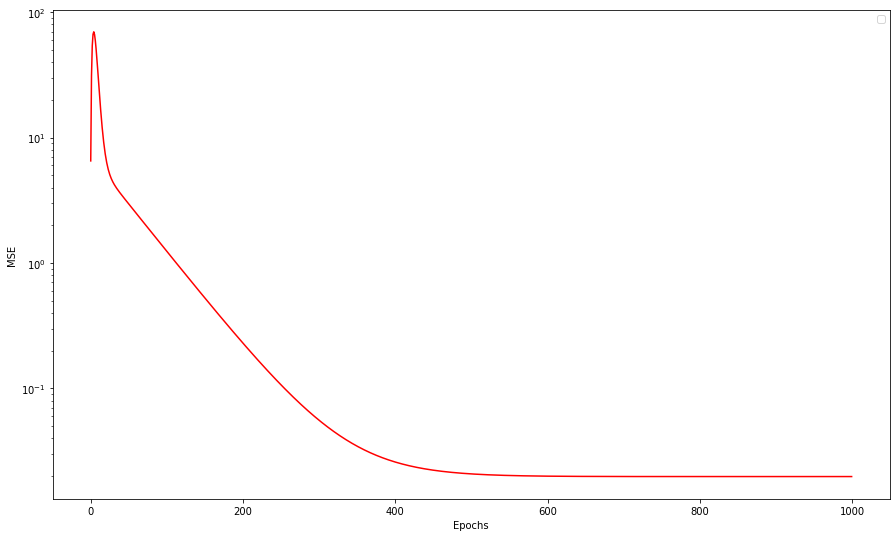

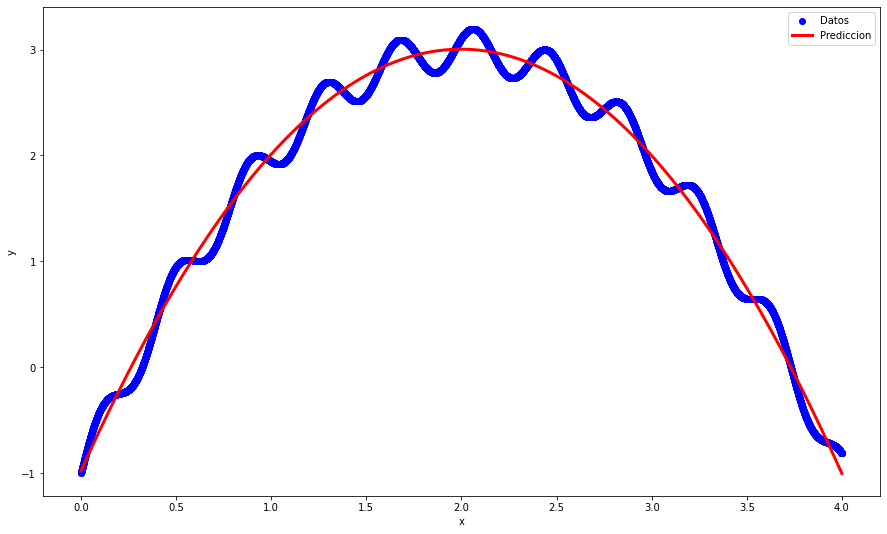

In [37]:
# Grafica MSE vs. epochs
fig1, axs1 = plt.subplots(1, sharey=True, figsize=(15, 9))
axs1.semilogy(np.arange(epochs), MSE, linewidth=1.5, color='r')
axs1.legend()
axs1.axes.set_xlabel('Epochs')
axs1.axes.set_ylabel('MSE')

# Grafica datos vs. prediccion
y_pred = predict(X, w_vec)
fig2, axs2 = plt.subplots(1, sharey=True, figsize=(15, 9))
axs2.scatter(x, y, color='b', label='Datos')
axs2.plot(x, y_pred, linewidth=3, color='r', label='Prediccion')
axs2.legend()
axs2.axes.set_xlabel('x')
axs2.axes.set_ylabel('y')